In [1]:
from google.colab import drive
import os
drive.mount('/content/drive/')
os.chdir('/content/drive/My Drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
import pandas as pd
data = pd.read_csv('/content/drive/My Drive/August01_Tweets_Final.csv')

In [3]:
!pip install vaderSentiment
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

     |████████████████████████████████| 133kB 2.8MB/s 


In [0]:
import operator

In [5]:
sentiment_id = SentimentIntensityAnalyzer()


lists = []

for index, row in data.iterrows():
  sentiment_score = sentiment_id.polarity_scores(row["tweet"])
  lists.append(sentiment_score)
  
se = pd.Series(lists)
print(se)
#max_score = max(se.iteritems(), key=operator.itemgetter(1))[1]
data['polarity'] = se.values

display(data.head(10))

0        {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
1        {'neg': 0.0, 'neu': 0.675, 'pos': 0.325, 'comp...
2        {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
3        {'neg': 0.0, 'neu': 0.868, 'pos': 0.132, 'comp...
4        {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
                               ...                        
41287    {'neg': 0.235, 'neu': 0.765, 'pos': 0.0, 'comp...
41288    {'neg': 0.0, 'neu': 0.786, 'pos': 0.214, 'comp...
41289    {'neg': 0.0, 'neu': 0.897, 'pos': 0.103, 'comp...
41290    {'neg': 0.0, 'neu': 0.629, 'pos': 0.371, 'comp...
41291    {'neg': 0.0, 'neu': 0.711, 'pos': 0.289, 'comp...
Length: 41292, dtype: object


,created_at,hashtags,tweetid,lang,tweet,userid,polarity
0,Thu Aug 01 15:00:00 +0000 2019,ThursdayThoughts,1156942663792451587,en,Kids need to see models of those living a bala...,1058185154726948865,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,Thu Aug 01 15:00:00 +0000 2019,"Joke,Humour,Elf,ElfJokes",1156942663792451586,en,What’s do you call Santa’s singing elves? Wrap...,977120954802475008,"{'neg': 0.0, 'neu': 0.675, 'pos': 0.325, 'comp..."
2,Thu Aug 01 15:00:00 +0000 2019,CarFromJapan,1156942663809032194,en,5# Engine Vibration Cause: Car Axle\nYou can g...,2744724846,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,Thu Aug 01 15:00:00 +0000 2019,"Children,earlylanguage",1156942663788032005,en,Did you know? #Children with good #earlylangua...,1131185733899882496,"{'neg': 0.0, 'neu': 0.868, 'pos': 0.132, 'comp..."
4,Thu Aug 01 15:00:01 +0000 2019,gviewsyoutube,1156942667973980161,en,Another review!! @gviewsyoutube #gviewsyoutube...,812135824913498113,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
5,Thu Aug 01 15:00:01 +0000 2019,SmartModel,1156942667986755586,en,"As Charles is a bit thick, don't fancy his cha...",352615777,"{'neg': 0.137, 'neu': 0.863, 'pos': 0.0, 'comp..."
6,Thu Aug 01 15:00:01 +0000 2019,BONADrinks,1156942667982487552,en,Enjoy this easy to make infused gin and tonic:...,297363238,"{'neg': 0.0, 'neu': 0.621, 'pos': 0.379, 'comp..."
7,Thu Aug 01 15:00:01 +0000 2019,"CHUU,츄",1156942667982336002,en,190727 #CHUU #츄\n© first apple https://t.co/Ii...,869892069099044864,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
8,Thu Aug 01 15:00:01 +0000 2019,Climatechange,1156942667999170561,en,#Climatechange is taking its first victims: po...,1017827828602232832,"{'neg': 0.223, 'neu': 0.777, 'pos': 0.0, 'comp..."
9,Thu Aug 01 15:00:01 +0000 2019,NastyGalsDoItBetter,1156942668011835392,en,When you casually (purposely) come across an e...,19030283,"{'neg': 0.0, 'neu': 0.841, 'pos': 0.159, 'comp..."


In [0]:
sentiment_id = SentimentIntensityAnalyzer()

In [7]:
lists = []

for index, row in data.iterrows():
  sentiment_score = sentiment_id.polarity_scores(row["tweet"])
  lists.append(sentiment_score["compound"])
  
se = pd.Series(lists)
print(se)
#max_score = max(se.iteritems(), key=operator.itemgetter(1))[1]
data['polarity'] = se.values

display(data.head(10))

0        0.0000
1        0.6486
2        0.0000
3        0.4404
4        0.0000
          ...  
41287   -0.8074
41288    0.4588
41289    0.1280
41290    0.6498
41291    0.7845
Length: 41292, dtype: float64


,created_at,hashtags,tweetid,lang,tweet,userid,polarity
0,Thu Aug 01 15:00:00 +0000 2019,ThursdayThoughts,1156942663792451587,en,Kids need to see models of those living a bala...,1058185154726948865,0.0000
1,Thu Aug 01 15:00:00 +0000 2019,"Joke,Humour,Elf,ElfJokes",1156942663792451586,en,What’s do you call Santa’s singing elves? Wrap...,977120954802475008,0.6486
2,Thu Aug 01 15:00:00 +0000 2019,CarFromJapan,1156942663809032194,en,5# Engine Vibration Cause: Car Axle\nYou can g...,2744724846,0.0000
3,Thu Aug 01 15:00:00 +0000 2019,"Children,earlylanguage",1156942663788032005,en,Did you know? #Children with good #earlylangua...,1131185733899882496,0.4404
4,Thu Aug 01 15:00:01 +0000 2019,gviewsyoutube,1156942667973980161,en,Another review!! @gviewsyoutube #gviewsyoutube...,812135824913498113,0.0000
5,Thu Aug 01 15:00:01 +0000 2019,SmartModel,1156942667986755586,en,"As Charles is a bit thick, don't fancy his cha...",352615777,-0.1511
6,Thu Aug 01 15:00:01 +0000 2019,BONADrinks,1156942667982487552,en,Enjoy this easy to make infused gin and tonic:...,297363238,0.7269
7,Thu Aug 01 15:00:01 +0000 2019,"CHUU,츄",1156942667982336002,en,190727 #CHUU #츄\n© first apple https://t.co/Ii...,869892069099044864,0.0000
8,Thu Aug 01 15:00:01 +0000 2019,Climatechange,1156942667999170561,en,#Climatechange is taking its first victims: po...,1017827828602232832,-0.3182
9,Thu Aug 01 15:00:01 +0000 2019,NastyGalsDoItBetter,1156942668011835392,en,When you casually (purposely) come across an e...,19030283,0.1779


In [0]:
X = data['tweet'].values
Y = data['polarity'].values#compound

In [9]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
tk = Tokenizer(lower = True)
tk.fit_on_texts(X)
X_seq = tk.texts_to_sequences(X)
X_pad = pad_sequences(X_seq, maxlen = 100, padding = 'post')

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_pad, Y, test_size = 0.2, random_state = 0)

In [0]:
import numpy as np

In [14]:
f = open('/content/drive/My Drive/polarity_scores/glove.6B.100d.sample.txt')
embedd_index = {}
for line in f:
    val = line.split()
    word = val[0]
    coff = np.asarray(val[1:],dtype = 'float')
    embedd_index[word] = coff

f.close()
print('Found %s word vectors.' % len(embedd_index))

Found 100 word vectors.


In [0]:
index_of_words = tk.word_index
embed_num_dims= 100
embedding_matrix = np.zeros((len(index_of_words) + 1, embed_num_dims))

tokens = []
labels = []

for word,i in index_of_words.items():
    temp = embedd_index.get(word)
    if temp is not None:
        embedding_matrix[i] = temp

In [0]:
from keras.layers import Dense , Flatten ,Embedding,Input
#Embedding layer before the actual BLSTM 
embedd_layer = Embedding(len(index_of_words) + 1 , embed_num_dims , input_length = 100 , weights = [embedding_matrix])

In [0]:
batch_size = 64
X_train1 = X_train[batch_size:]
y_train1 = y_train[batch_size:]
X_valid = X_train[:batch_size]
y_valid = y_train[:batch_size]

In [0]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.layers import Bidirectional, GlobalMaxPooling1D
vocabulary_size = len(tk.word_counts.keys())+1
max_words = 100
embedding_size = 32
model = Sequential()
model.add(embedd_layer)
model.add(Bidirectional(LSTM(30 , return_sequences = True , dropout = 0.1 , recurrent_dropout = 0.1)))
model.add(GlobalMaxPooling1D())
model.add(Dense(30,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation = 'sigmoid'))

from keras import metrics

model.compile(loss = 'mean_squared_error',
              optimizer = 'sgd',
              metrics=[metrics.mean_squared_error])

In [19]:
history = model.fit(X_train1, y_train1, validation_data = (X_valid, y_valid), batch_size = batch_size, epochs = 10)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 32969 samples, validate on 64 samples
Epoch 1/10
32969/32969 [==============================] - 97s 3ms/step - loss: 0.1940 - mean_squared_error: 0.1940 - val_loss: 0.1566 - val_mean_squared_error: 0.1566
Epoch 2/10
32969/32969 [==============================] - 94s 3ms/step - loss: 0.1635 - mean_squared_error: 0.1635 - val_loss: 0.1518 - val_mean_squared_error: 0.1518
Epoch 3/10
32969/32969 [==============================] - 94s 3ms/step - loss: 0.1621 - mean_squared_error: 0.1621 - val_loss: 0.1506 - val_mean_squared_error: 0.1506
Epoch 4/10
32969/32969 [==============================] - 94s 3ms/step - loss: 0.1614 - mean_squared_error: 0.1614 - val_loss: 0.1499 - val_mean_squared_error: 0.1499
Epoch 5/10
32969/32969 [==============================] - 94s 3ms/step - loss: 0.1609 - mean_squared_error: 0.1609 - val_loss: 0.1493 - val_mean_squared_error: 0.1493
Epoch 6/10
32969/32969 [==============================] - 94s 3ms/step - loss: 0.1604 - mean_squared_error: 0.1604 - v

In [0]:
scores = model.evaluate(X_test, y_test, verbose = 0)

In [21]:
score_predict = model.predict(X_pad, verbose = 0)
print(score_predict)

[[0.1836083 ]
 [0.18691158]
 [0.20030594]
 ...
 [0.18569736]
 [0.19810733]
 [0.18051955]]


In [0]:
# using MAE as loss function
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.layers import Bidirectional, GlobalMaxPooling1D
vocabulary_size = len(tk.word_counts.keys())+1
max_words = 100
embedding_size = 32
model = Sequential()
model.add(embedd_layer)
model.add(Bidirectional(LSTM(30 , return_sequences = True , dropout = 0.1 , recurrent_dropout = 0.1)))
model.add(GlobalMaxPooling1D())
model.add(Dense(30,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation = 'sigmoid'))

from keras import metrics

model.compile(loss = 'mean_absolute_error',
              optimizer = 'sgd',
              metrics=[metrics.mae])

In [23]:
history = model.fit(X_train1, y_train1, validation_data = (X_valid, y_valid), batch_size = batch_size, epochs = 10)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 32969 samples, validate on 64 samples
Epoch 1/10
32969/32969 [==============================] - 96s 3ms/step - loss: 0.3686 - mean_absolute_error: 0.3686 - val_loss: 0.3468 - val_mean_absolute_error: 0.3468
Epoch 2/10
32969/32969 [==============================] - 94s 3ms/step - loss: 0.3327 - mean_absolute_error: 0.3327 - val_loss: 0.3157 - val_mean_absolute_error: 0.3157
Epoch 3/10
32969/32969 [==============================] - 96s 3ms/step - loss: 0.3200 - mean_absolute_error: 0.3200 - val_loss: 0.3015 - val_mean_absolute_error: 0.3015
Epoch 4/10
32969/32969 [==============================] - 95s 3ms/step - loss: 0.3147 - mean_absolute_error: 0.3147 - val_loss: 0.2951 - val_mean_absolute_error: 0.2951
Epoch 5/10
32969/32969 [==============================] - 96s 3ms/step - loss: 0.3119 - mean_absolute_error: 0.3119 - val_loss: 0.2918 - val_mean_absolute_error: 0.2918
Epoch 6/10
32969/32969 [==============================] - 97s 3ms/step - loss: 0.3100 - mean_absolute_error:

In [0]:
scores = model.evaluate(X_test, y_test, verbose = 0)

In [25]:
scores

[0.30263453460386325, 0.30263450741767883]

In [26]:
score_predict = model.predict(X_pad, verbose = 0)
print(score_predict)

[[0.00507659]
 [0.00604457]
 [0.00381699]
 ...
 [0.00318243]
 [0.00334683]
 [0.00395335]]


In [27]:
score_predict = model.predict(X_test)
print(min(score_predict))
print(min(y_test))

[0.00216109]
-0.9934


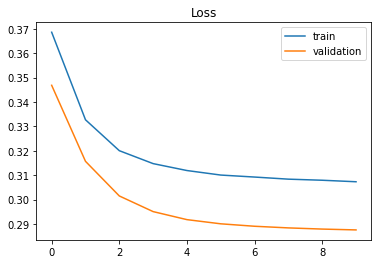

In [28]:
# loss plot for training and validation
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()

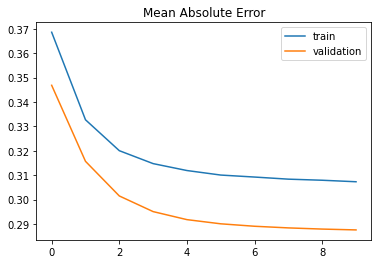

In [29]:
# MAE plot for training and validation
plt.title('Mean Absolute Error')
plt.plot(history.history['mean_absolute_error'], label='train')
plt.plot(history.history['val_mean_absolute_error'], label='validation')
plt.legend()
plt.show();